## Анализ убытков приложения ProcrastinatePRO+ 

### Задачи проекта 
Задача для маркетингового аналитика развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Необходимо разобраться в причинах и помочь компании выйти в плюс.

### Описание проекта 
Проведен анализ данных от ProcrastinatePRO+.
Рассчитаны различные метрики, использован когортный анализ: LTV, CAC, Retention rate, DAU, WAU, MAU и т.д. Использованы уже написанные ранее функции расчёта метрик. Сделаны выводы по полученным данным.

### Выводы 

#### Причины неэффективности привлечения пользователей.
 
  - Три канала привлечения - TipTop, FaceBoom и AdNonSense не окупаются. 
  - Привлечение пользователей из США стоит дороже всего, но траты не окупаются. 
  - Высокая стоимость привлечения пользователи iPhone и Mac не оправдывает себя, несмотря на то, что они имеют   высокий LTV.  

#### Рекомендации для отдела маркетинга.
  - Снизить долю канала TipTop в рекламном бюджете. Совсем отказываться от него не стоит, поскольку у него высокий LTV. Лучше сместить акцент на lambdaMediaAds. 
  -  Оптимизировать затраты на привлечение пользователей из США - обратить внимание на пользователей Android в этом регионе и рекламный канал YRabbit. Снизить траты на привлечение через TipTop.
  - Сфокусироваться на пользователях из Германии, Франции и Великобритиании. Исходя из расходов бюджета сейчас все внимание направлено на США в ущерб этим регионам. 
  - Перераспределить траты с пользователей iPhone и Mac на PC в регионах Германии, Франции и Великобритиании. 

### Загрузка данных и подготовка их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
# Загружаем необходимые для работы библиотеки 

import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from datetime import timedelta
import seaborn as sns
import numpy as np

In [2]:
# Загружаем файлы 
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv').copy()
    orders = pd.read_csv('/datasets/orders_info_short.csv').copy()
    costs = pd.read_csv('/datasets/costs_info_short.csv').copy()
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv').copy()
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv').copy()
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv').copy()

#### Обзор данных

In [3]:
# Посмотрим на данные в каждой таблице. Начнем с visits  

display(visits.sample(10))
visits.info()

,User Id,Region,Device,Channel,Session Start,Session End
162069,459893432840,United States,Android,MediaTornado,2019-09-27 15:30:27,2019-09-27 15:51:35
175533,185500608562,United States,Mac,TipTop,2019-10-06 12:22:26,2019-10-06 12:44:20
1058,68212023120,United States,iPhone,TipTop,2019-05-02 03:31:23,2019-05-02 03:43:41
171290,4948320602,United States,Mac,FaceBoom,2019-10-03 12:01:08,2019-10-03 12:18:01
102913,869402237686,United States,Mac,organic,2019-08-09 04:32:49,2019-08-09 05:16:04
112741,320965453471,United States,PC,FaceBoom,2019-08-18 19:17:28,2019-08-18 20:03:47
117933,944570784300,United States,iPhone,FaceBoom,2019-08-22 06:50:39,2019-08-22 08:03:14
288634,32024296735,UK,PC,WahooNetBanner,2019-09-28 18:08:01,2019-09-28 18:10:58
182490,758970028450,United States,Android,FaceBoom,2019-10-11 11:23:39,2019-10-11 12:09:18
154684,243067975855,United States,iPhone,organic,2019-09-22 03:07:46,2019-09-22 03:40:08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
display(orders.sample(10))
orders.info()
orders.describe()

,User Id,Event Dt,Revenue
39188,463747376309,2019-10-21 13:15:26,4.99
28999,199345482985,2019-06-03 18:28:00,4.99
38498,364991535160,2019-10-14 08:50:21,4.99
7047,778027854258,2019-07-10 04:24:18,4.99
1393,822872249205,2019-05-24 10:02:04,4.99
1134,478259517211,2019-05-21 20:28:32,4.99
23109,438567298253,2019-10-09 16:10:24,4.99
28763,408184186042,2019-05-29 05:52:39,19.99
29728,657264508332,2019-06-21 17:19:45,4.99
3465,864749475534,2019-06-14 05:04:49,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


In [5]:
display(costs.sample(10))
costs.info()
costs.describe()

,dt,Channel,costs
919,2019-05-20,AdNonSense,36.75
1698,2019-07-18,lambdaMediaAds,5.60
1463,2019-05-24,WahooNetBanner,12.60
1578,2019-09-16,WahooNetBanner,34.20
844,2019-09-02,YRabbit,5.04
438,2019-07-18,RocketSuperAds,2.73
474,2019-08-23,RocketSuperAds,3.90
790,2019-07-10,YRabbit,2.52
126,2019-09-04,FaceBoom,148.50
505,2019-09-23,RocketSuperAds,10.40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


#### Обработка дубликатов

In [6]:
# Проверим таблицы на наличие дубликатов

print('Количество явных дубликатов во датафреймах:')
print('visits - ', visits.duplicated().sum())
print('orders -', orders.duplicated().sum())
print('costs -', costs.duplicated().sum())

Количество явных дубликатов во датафреймах:
visits -  0
orders - 0
costs - 0


#### Переименование столбцов 

In [7]:
# Приведем названия столбцов таблиц к нижнему регистру 

visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
visits.head(1)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01


In [8]:
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
orders.head(1)

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99


In [9]:
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]
costs.head(1)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3


#### Изменение типа данных

In [10]:
# Приведем данные о времени к временному типу данных

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

display(visits.dtypes)
display(orders.dtypes)
display(costs.dtypes)

user_id                   int64
region                   object
device                   object
channel                  object
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object

dt          object
channel     object
costs      float64
dtype: object

In [77]:
# Группируем данные заказов по user_id и дате заказа 
orders_grouped = orders.groupby(['user_id', orders['event_dt'].dt.date]).size().reset_index(name='order_count')

# Группируем данные визитов по user_id и дате визита 
visits_grouped = visits.groupby(['user_id', visits['session_start'].dt.date]).size().reset_index(name='visit_count')

# Объединяем данные по user_id и дате 
data_merged = pd.merge(orders_grouped, visits_grouped, on=['user_id'], how='left')

#Смотрим несовпадения 
data_difference = data_merged[data_merged['visit_count'].isnull()]

if len(data_difference) > 0:
    print('Есть несовпадения между датами посещений и датами заказов:')
    display(data_difference)
else:
    print('Даты покупок и даты посещений совпадают')

Даты покупок и даты посещений совпадают


#### Пропуски в данных 

In [11]:
visits.isna().sum().sort_values(ascending=False)

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [12]:
orders.isna().sum().sort_values(ascending=False)

user_id     0
event_dt    0
revenue     0
dtype: int64

In [13]:
costs.isna().sum().sort_values(ascending=False)

dt         0
channel    0
costs      0
dtype: int64

#### Промежуточный вывод

Посмотрели на имеющиеся данные, привели названия столбцов во всех таблицах к единому стилю, проверили данные на дубликаты и пропуски, а также изменили тип данных о времени.  

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция для создания пользовательских профилей

In [14]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция для расчета удержания

In [15]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для расчета конверсии

In [16]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для расчета LTV и ROI

In [17]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функция для сглаживания фреймов по скользящему среднему

In [18]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция для визуализации удержания

In [19]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )

    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### Функция для визуализации конверсии

In [20]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 6))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция для визуализации LTV и ROI

In [21]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Промежуточный вывод

Создали все необходимые для работы функции 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профиль пользователей

In [22]:
# Создадим профили пользователей и сохраним их в переменной profiles

profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [23]:
# Определим минимальную и максимальную дату привлечения пользоватлей 

min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()

display(min_analysis_date)
display(max_analysis_date)

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

Вывод: таблица профилей пользователей получилась, а даты привлечения совпадают с изначальным периодом 

#### Страны откуда приходят пользователи 

In [24]:
# Определяем регионы и количество пользоваделей по регионам
region = profiles.groupby('region') \
                 .agg({'user_id':'count'}) \
                 .sort_values(by = 'user_id', ascending = False)

# Выясняем какие страны дают больше всего платящих пользователей
top_region = profiles.query('payer == True') \
                     .groupby('region') \
                     .agg({'user_id':'count'}) \
                     .sort_values(by = 'user_id', ascending = False)

# Объединяем таблицы
top_region.columns = ['user_sum']
region = region.merge(top_region, on='region', how='left')

# Добавляем столбец с долей платящих пользователей
region['percent_pay'] = (region['user_sum'] / region['user_id']) * 100
display(region)

,user_id,user_sum,percent_pay
region,,,
United States,100002,6902,6.901862
UK,17575,700,3.982930
France,17450,663,3.799427
Germany,14981,616,4.111875


Вывод: Больше всего пользоватлей приходит из United States, на неё же приходится большая часть платящих пользователей 

#### Устройства клиентов 

In [25]:
# Группируем всех пользователей по устройству
device = profiles.groupby('device') \
                 .agg({'user_id':'count'}) \
                 .sort_values(by = 'user_id', ascending = False)

# Группируем платящих пользователей по устройству
top_device = profiles.query('payer == True') \
                     .groupby('device').agg({'user_id':'count'}) \
                     .sort_values(by = 'user_id', ascending = False)

# Объединяем таблицы
top_device.columns = ['user_sum']
device = device.merge(top_device, on = 'device', how = 'left')

# Добавляем столбец с долей платящих пользователей
device['pay_percent'] = (device['user_sum'] / device['user_id']) * 100
display(device)

,user_id,user_sum,pay_percent
device,,,
iPhone,54479,3382,6.207897
Android,35032,2050,5.851793
PC,30455,1537,5.046790
Mac,30042,1912,6.364423


Вывод: Больше всего пользователей используют iPhone и на них же приходится наибольшая доля платежей

#### Рекламные источники 

In [26]:
# Группируем пользователей по каналу перехода
channel = profiles.groupby('channel') \
                  .agg({'user_id':'count'}) \
                  .sort_values(by='user_id', ascending = False)

# Определяем самые популярные каналы перехода
top_channel = profiles.query('payer == True') \
                      .groupby('channel') \
                      .agg({'user_id':'count'}) \
                      .sort_values(by = 'user_id', ascending = False)

# Объединяем таблицы
top_channel.columns = ['user_sum']
channel = channel.merge(top_channel, on = 'channel', how = 'left')

# Добавляем столбец с долей платящих пользователей
channel['pay_percent'] = (channel['user_sum'] / channel['user_id']) * 100
display(channel.sort_values(by = 'pay_percent', ascending = False))

,user_id,user_sum,pay_percent
channel,,,
FaceBoom,29144,3557,12.204914
AdNonSense,3880,440,11.340206
lambdaMediaAds,2149,225,10.469986
TipTop,19561,1878,9.600736
RocketSuperAds,4448,352,7.913669
WahooNetBanner,8553,453,5.296387
YRabbit,4312,165,3.826531
MediaTornado,4364,156,3.574702
LeapBob,8553,262,3.063253


Вывод: Больше всего пользователей приходит через канал organic, однако у этого канала наименьшая доля платящих пользователей - чуть больше 2%. Больше всего платящих поьзователей приходят через каналы FaceBoom, AdNonSense и lambdaMediaAds. Суммарно на них приходится больше 30% платящих пользователей, а среди этой тройки наибольшая доля платящих пользователей приходится на FaceBoom - больше 12%.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Общая сумма расходов на маркетинг 

In [27]:
sum_costs = round(costs['costs'].sum(), 2)
print('Общая сумма затрат на рекламу: {}'. format(sum_costs))

Общая сумма затрат на рекламу: 105497.3


#### Распределение трат по рекламным источникам

In [28]:
channel_costs = profiles.groupby('channel') \
                        .agg({'acquisition_cost':'sum'}) \
                        .sort_values(by = 'acquisition_cost', ascending = False)
display(channel_costs)

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Вывод: Самые высоки затраты на канал привлечения TipTop. Учитывая, что общие затраты на рекламу составили 105497.3, то сумма в 54751.30 - это почти половина всех расходов на рекламу. При этом доля платящих пользователей от канала TipTop всего около 9%. Получается половина расходов на рекламу идет на не самый выгодный канал. Кажется, средства расходуются не очень рационально. Второй по тратам - FaceBoom, но, как мы помним из предыдущего шага, на него приходится наибольшая доля платящих пользователей.   

#### Визуализация динамики изменения расходов по неделям и по месяцам

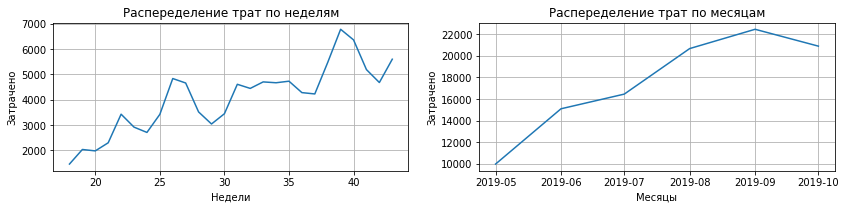

In [29]:
# Выделим из данных о времени недели 
profiles['week'] = pd.to_datetime(profiles['dt']).dt.isocalendar().week

# Сгруппируем данные о тратах по неделям 
costs_week = profiles.groupby('week') \
                      .agg({'acquisition_cost':'sum'}) \
                      .sort_values(by = 'week').reset_index()

# Сгруппируем данные о тратах по месяцам 
costs_month = profiles.groupby('month') \
                      .agg({'acquisition_cost':'sum'}) \
                      .sort_values(by = 'month').reset_index()

#Зададим размер графика 
plt.figure(figsize=(14,6))

#График по неделям 
ax1 = plt.subplot(2, 2, 1)
ax1 = sns.lineplot(x = 'week', y = 'acquisition_cost', data = costs_week)
plt.title('Распеределение трат по неделям')
plt.xlabel('Недели')
plt.ylabel('Затрачено')
plt.grid()

# График по месяцам 
ax2 = plt.subplot(2, 2, 2)
ax2 = sns.lineplot(x = 'month', y = 'acquisition_cost', data = costs_month)
plt.title('Распеределение трат по месяцам')
plt.xlabel('Месяцы')
plt.ylabel('Затрачено')
plt.grid()

plt.show()

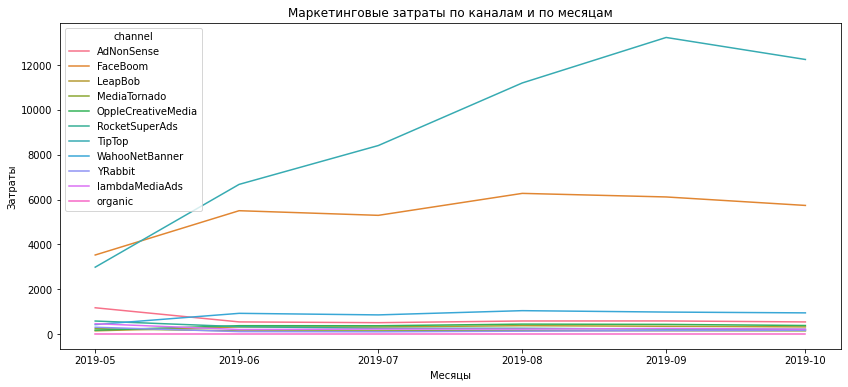

In [30]:
# График динамики изменения расходов

costs_month_channel = profiles.pivot_table(index = ['channel','month'], values = 'acquisition_cost', aggfunc = 'sum')
plt.figure(figsize = (14,6))
plt.title('Маркетинговые затраты по каналам и по месяцам')
plt.xlabel('Месяцы')
plt.ylabel('Затраты')
sns.lineplot(x = 'month', y = 'acquisition_cost', data = costs_month_channel, hue = 'channel')

plt.show()

Вывод: Видим, что с мая 2019 по сентябрь 2019 активно тратили на канал TipTop, хотя он дает лишь около 9% платящих пользователей и на четветом месте по привлечению, после сентября затраты на этот канал стали снижаться. В то же время затраты на канал с набольшей долей платящих пользователей FaceBoom почти в два раза ниже и они не сильно менялись во времени. 

#### Стоимость привлечения пользователя (CAC) из каждого источника 

In [31]:

# количество привлечённых пользователей по каналам
channel_user = profiles.groupby('channel').agg({'user_id':'count'})
channel_costs = channel_costs.merge(channel_user, on = 'channel', how = 'left')

# расчитываем среднюю стоимость привлечения пользователя по каналам привлечения
channel_costs['costs_user'] = round(channel_costs['acquisition_cost'] / channel_costs['user_id'], 3)
display(channel_costs)
print('Средняя стоимость привлечения пользователя = {}' \
      .format(round(profiles['acquisition_cost'].sum()/profiles['user_id'].count(), 3)))

,acquisition_cost,user_id,costs_user
channel,,,
TipTop,54751.30,19561,2.799
FaceBoom,32445.60,29144,1.113
WahooNetBanner,5151.00,8553,0.602
AdNonSense,3911.25,3880,1.008
OppleCreativeMedia,2151.25,8605,0.250
RocketSuperAds,1833.00,4448,0.412
LeapBob,1797.60,8553,0.210
lambdaMediaAds,1557.60,2149,0.725
MediaTornado,954.48,4364,0.219


Средняя стоимость привлечения пользователя = 0.703


Вывод: У канала TipTop максимальная стоимость привлечения на одного пользоватлея, дальше идут Faceboom и AdNonSense. Если вернуться к этапу определения доли платящих пользователей, то пришедшие из Faceboom и AdNonSense суммарно составляют около 20% платящих пользователей, поэтому можно заключить, что расходы на эти каналы оправданы, а вот TipTop снова вызывает вопросы - самые дорогие пользователи, но не самые платящие. 

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверить конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построем и изучим графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответим на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

#### Параметры анализа 

In [32]:
# Зададим параметры для расчета метрик
observation_date = datetime(2019, 11, 1).date()

horizon_days = 14

# Исключим органических пользователей из выборки
profiles_notorganic = profiles.query('channel != "organic"')

Вывод: Решил исключить органических пользователей поскольку, как мне кажется они могут создавать помехи. Их много и какую-то долю платящих пользователей они все-таки составляют. Хотя не уверен в решении, буду благодарен мнению на этот счет :) 

#### Общий анализ окупаемости рекламы

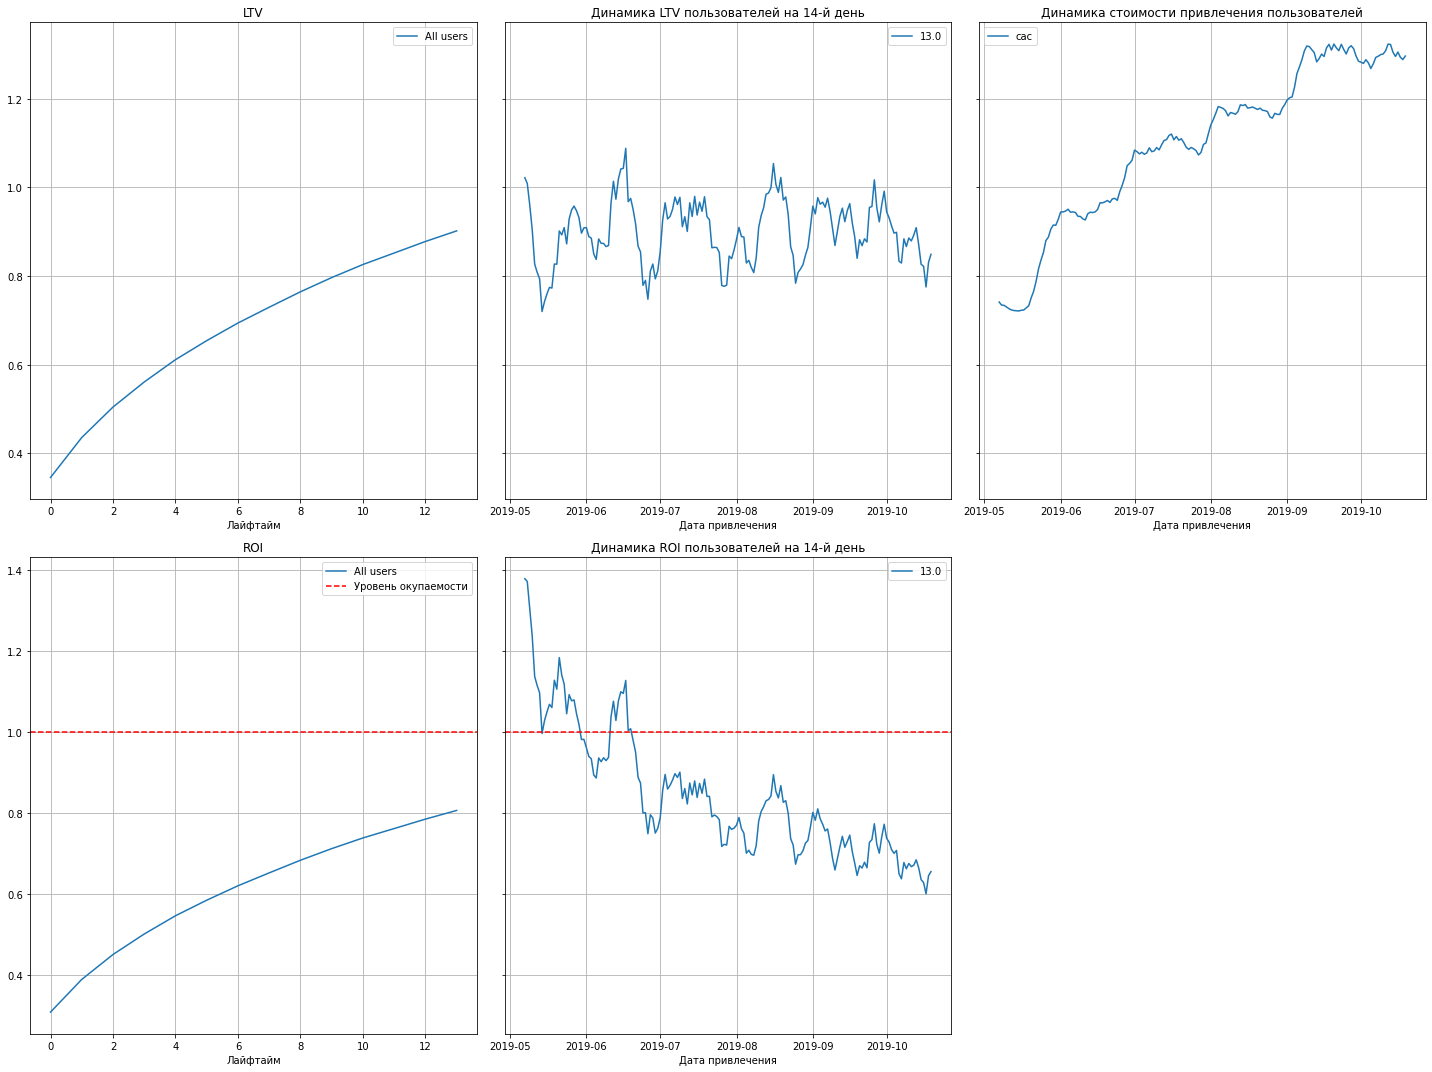

In [33]:
# Выводим графики LTV и ROI, а также динамики LTV, CAC и ROI

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv( \
    profiles_notorganic, orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Вывод: Видно, что ROI не дотягивает до 100%, значит затраты на рекламу не окупаются. ROI в динамике показывает, что в мае реклама окупалась, но потом началось падаение, с небольшим возвратом к окупаемости в середине июня, однако после этого пика началось стабильное падение. Также видим рост затрат на привлечение пользователей (CAC), но он не оправдал себя. 
 

#### Конверсия и удержание пользователей. 

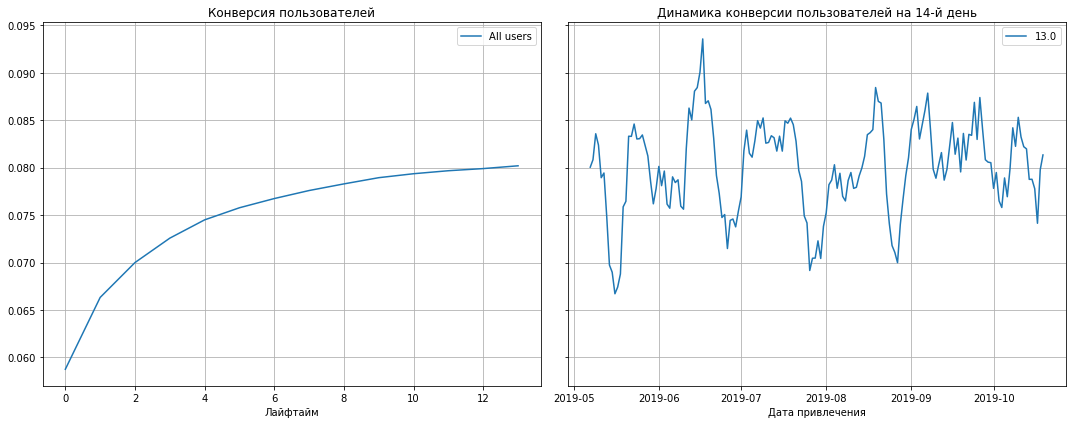

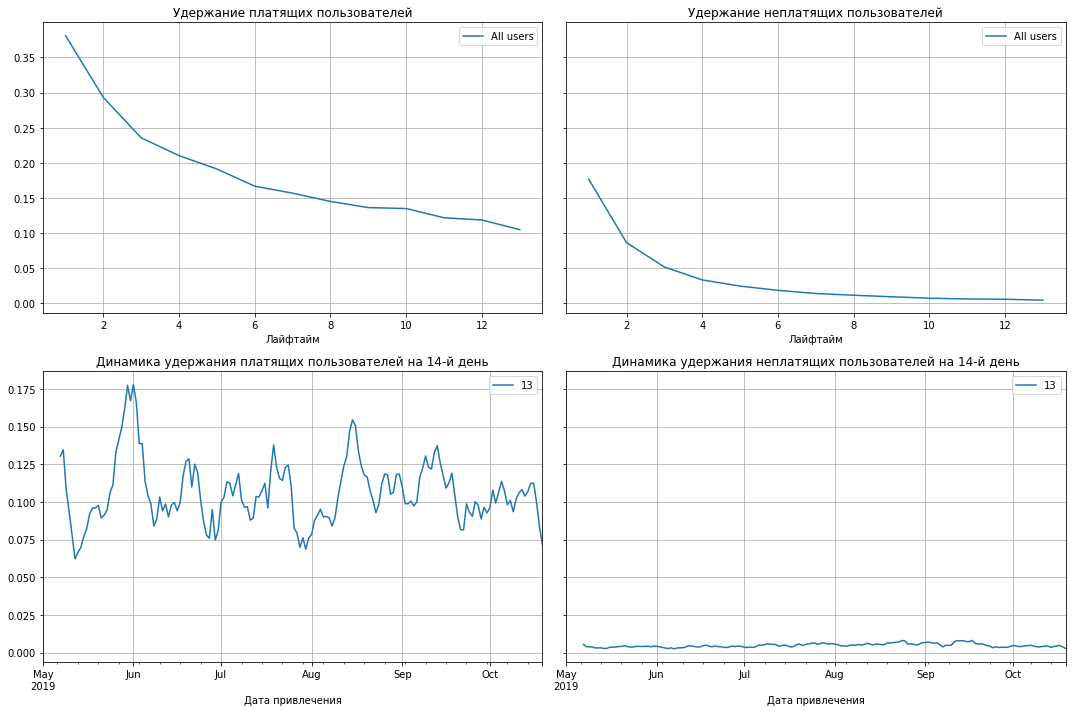

In [34]:
# Выводим графики конверсии и удержания
conversion_raw, conversion_grouped, conversion_history = get_conversion( \
    profiles_notorganic, orders, observation_date, horizon_days)
retention_raw, retention_grouped, retention_history = get_retention( \
    profiles_notorganic, visits, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days)
plot_retention(retention_grouped, retention_history, horizon_days)

Вывод: Неплатящие пользователи удерживаются хуже, чем платящие. Вроде бы так и должно быть, так что здесь все в порядке.

#### Окупаемость рекламы с разбивкой по устройствам


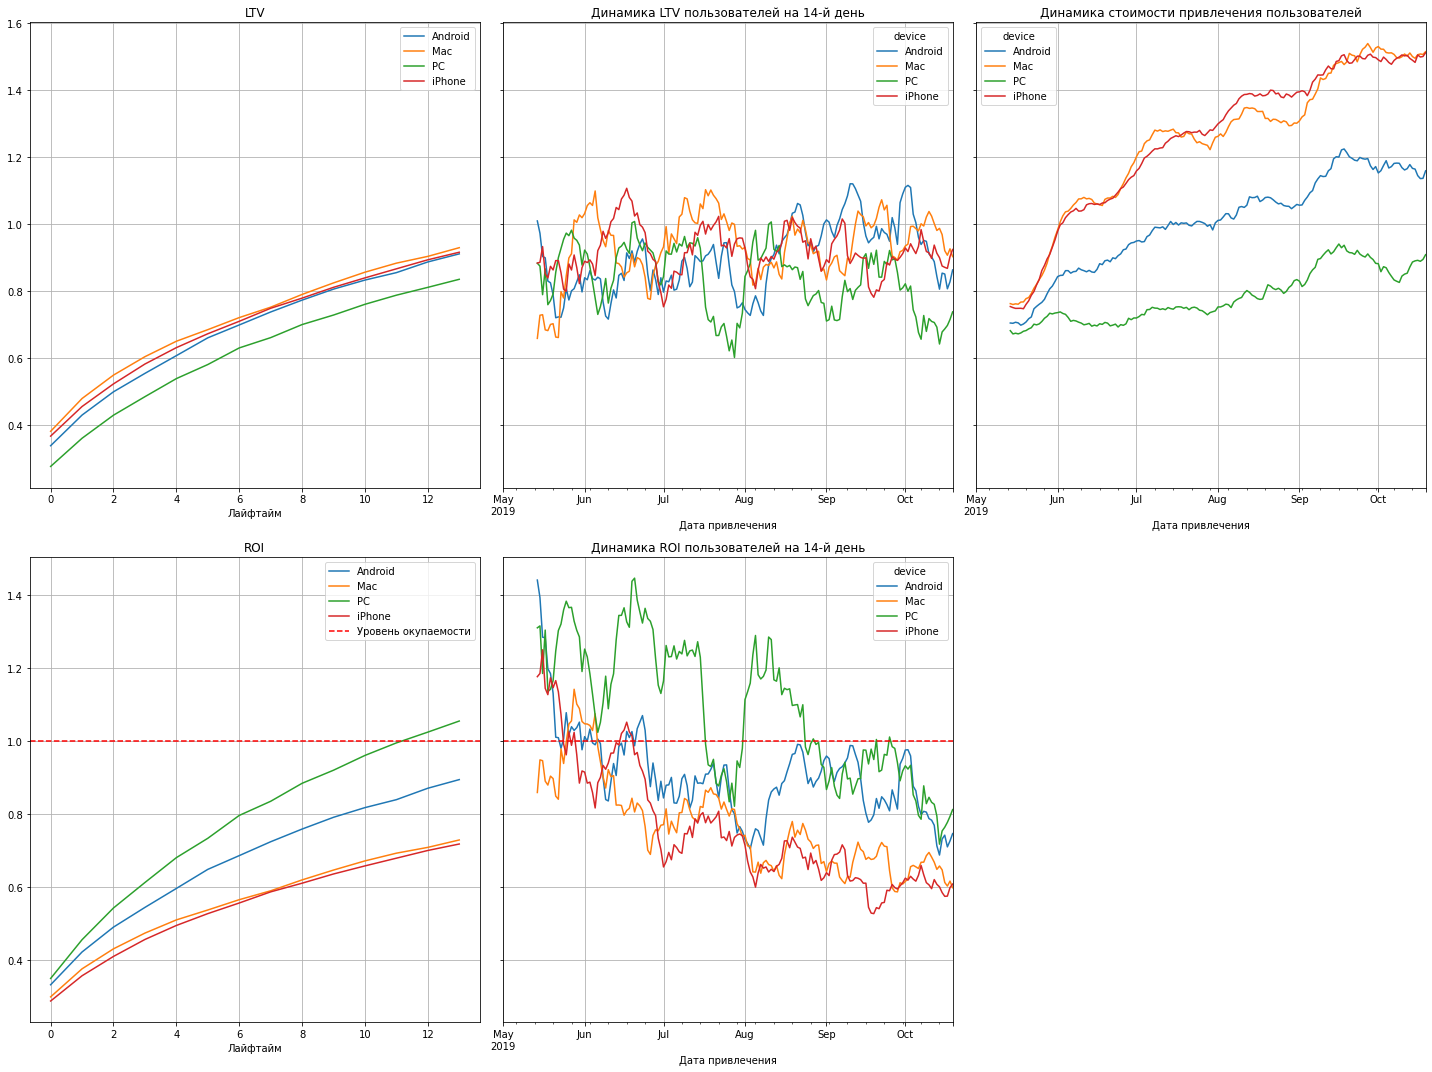

In [35]:
# Выводим графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разбивкой по устройствам 
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_notorganic, orders, observation_date, horizon_days, dimensions=['device'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Вывод: Линию окупаемости ROI пересекают только пользователи PC, но в динамике, после сентября они перестают окупаться. Также видно, что растет динамика стоимости прилечения пользователей Mac и iPhone, но затраты не окупаются. 

#### Окупаемость рекламы с разбивкой по странам

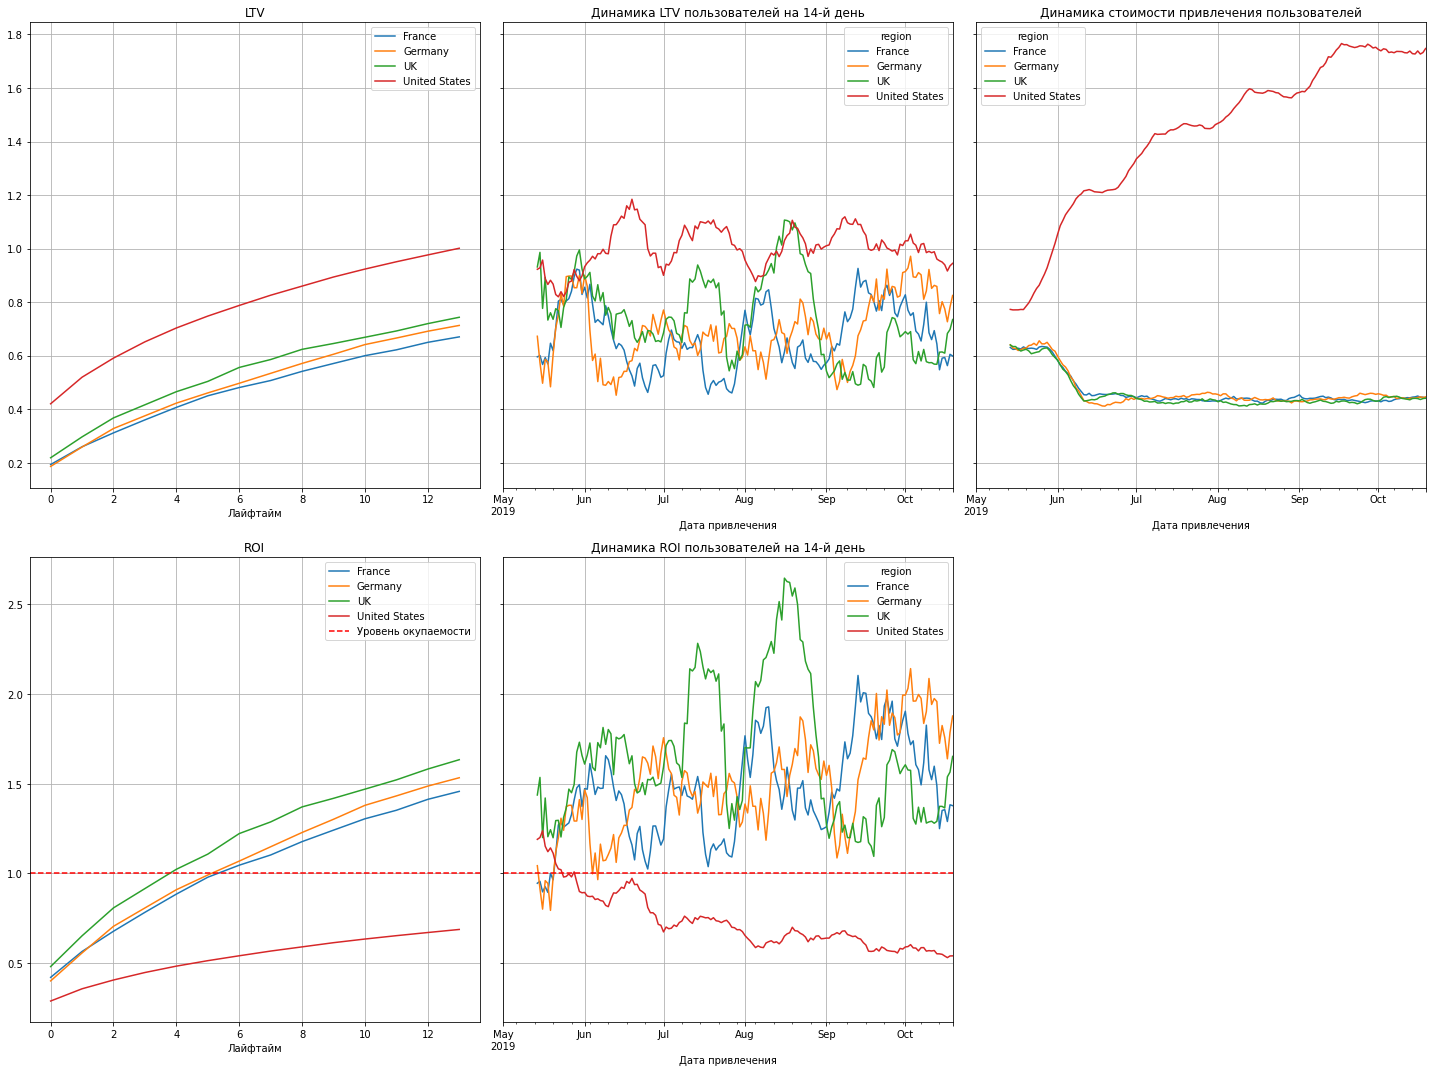

In [36]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_notorganic, orders, observation_date, horizon_days, dimensions=['region'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Вывод: Сразу видим, что у пользователей из США очень высокий LTV, получается, что больше всего денег приходит именно от них. Однако, несмотря на рост затрат на привлечение - они не окупаются, поскольку ROI в районе 60% а в динамике даже падает. 

Динамика стоимости привлечения остальных пользователей почему-то резко падает в июне и затем остается на одном уровне. При этом реклама окупается для всех остальных регионов, кроме США - что видно на графике ROI и ROI в динамике. 

Получается странно - на привлечение пользователей из всех остальных регионов денег тратится немного, но реклама для них окупается, и только для США затраты растут, а эффекта нет. 

####  Окупаемость рекламы с разбивкой по рекламным каналам

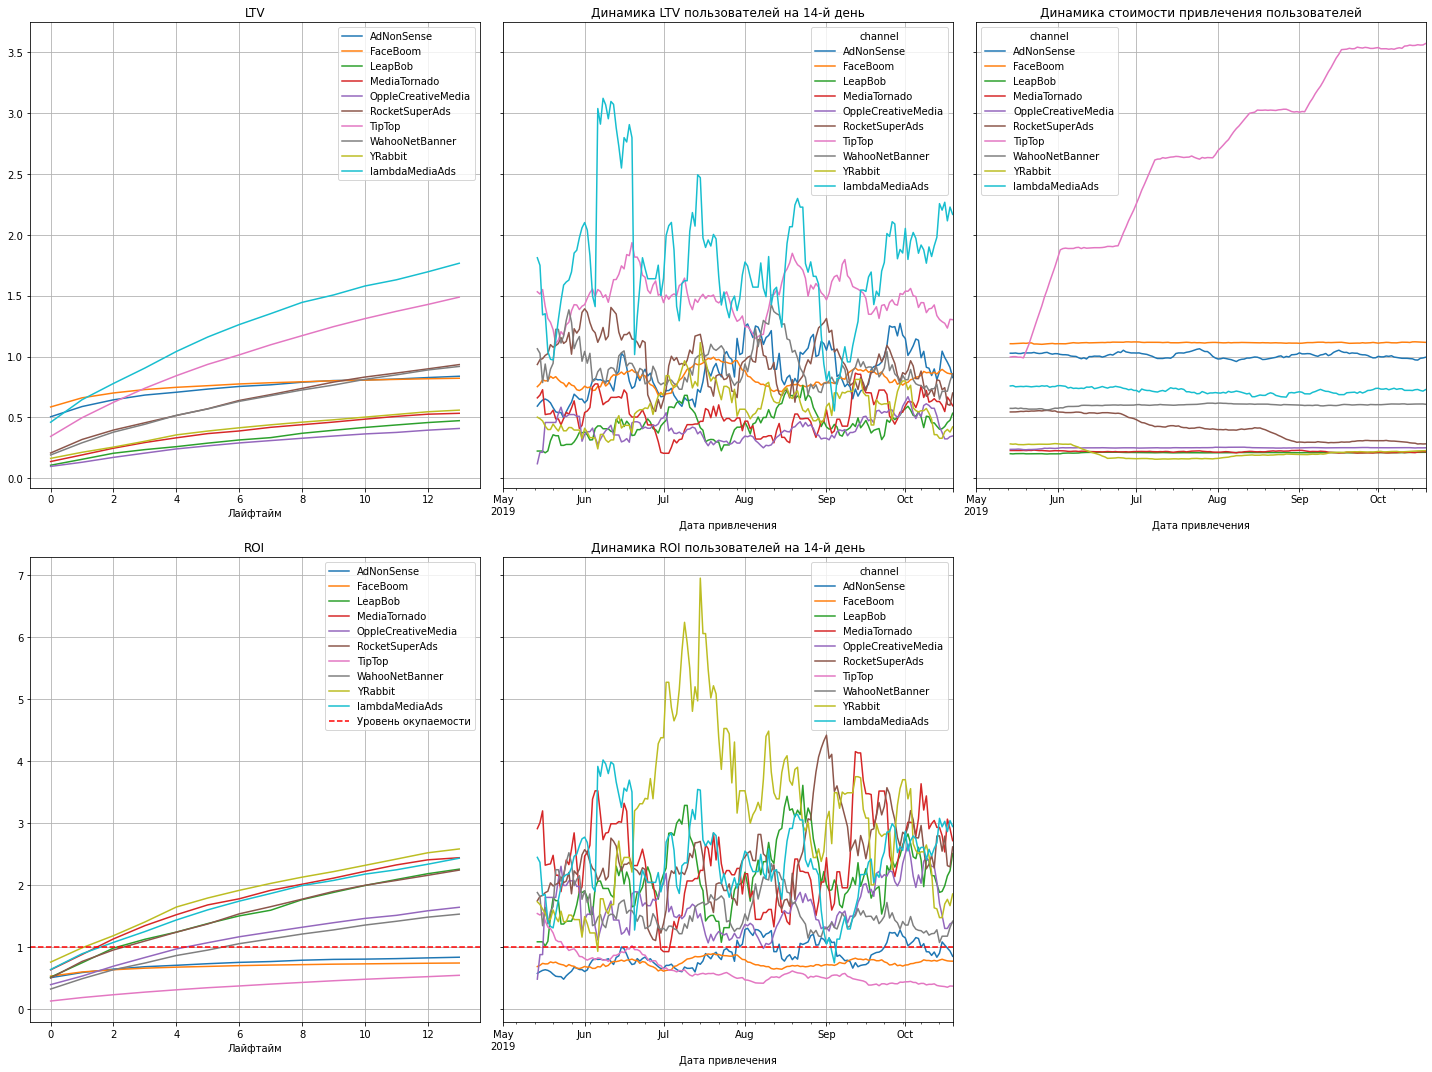

In [45]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
   profiles_notorganic, orders, observation_date, horizon_days, dimensions=['channel'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Вывод: 

- Реклама не окупается для трех каналов: AdNonSense, FaceBoom и TipTop 
- Затраты на привлечение пользователей не менялись, за исключением канала TipTop. Видно, что почти кажды месяц рекламный бюджет на этот канал рос. 
- Высокий LTV у канала Три канала привлечения - TipTop, FaceBoom и AdNonSense не выходят на уровень окупаемости. Реклама же в остальных каналах со 2-5 месяца вышла на окупаемость. 

#### Анализ окупаемости рекламы для региона США 

Взглянем подробнее на США и попытаемся найти причины неокупаемости привлечения пользователей 

In [51]:
profiles_usa = profiles.query('region == "United States"')

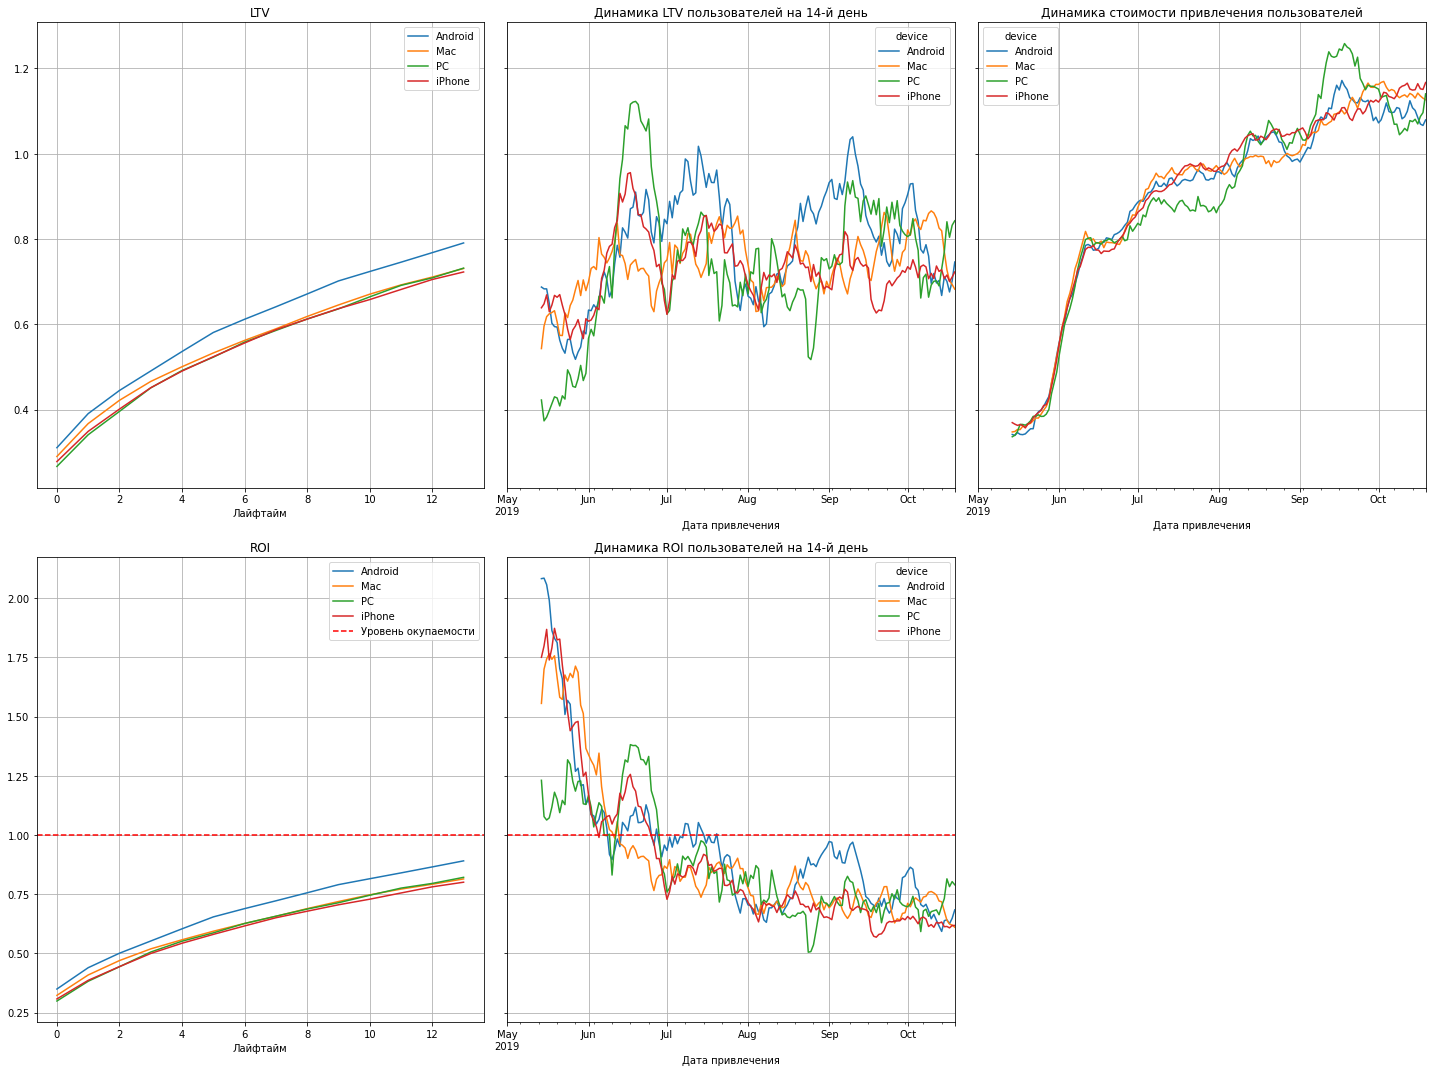

In [52]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=['device'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Вывод: Реклама в США не окупается ни для одного устройства. Затраты при этом постоянно росли. Больше всего прибыли генерируют пользователи Android. Возможно стоит снизить затраты на рекламу и больше сконцентрироваться на пользователях Andoid.

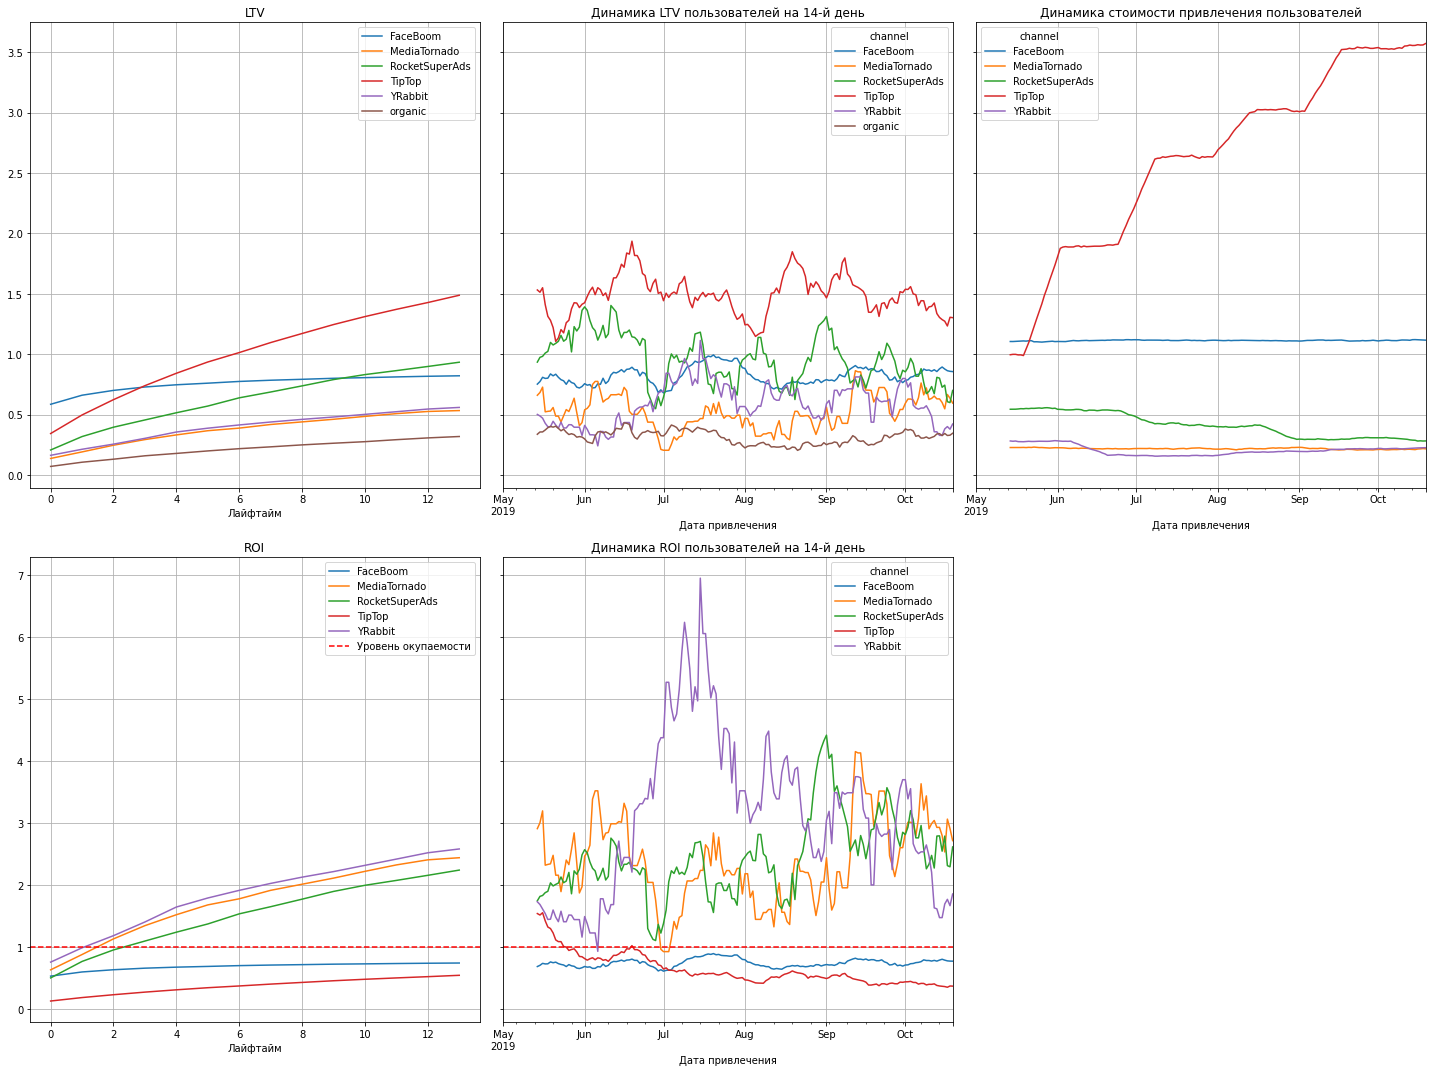

In [71]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=['channel'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Вывод: Видим что реклама не окупается для двух каналов привлечения - TipTop и FaceBoom. Также видим постоянный рост затрат на привлечение пользователей через TipTop. ROI показывает хорошую окупаемость для пользователей из YRabbit. Возможно стоит обратить внимание именно на этот канал и снизить затраты на TipTop

#### Вопросы 

Окупается ли реклама, направленная на привлечение пользователей в целом?

- Нет реклама не окупается, и дело не в бюджете. На этапе общего анализа видно, что траты на рекламу росли, но желаемого эффекта это не оказало. 

Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

- Из устройств, которые могут оказывать негативное влияние на окупаемость рекламы, можно выделить iPhone и Mac. Они обходятся дороже все всего, но не окупаются. В то время как меньше всего денег тратится на привлечение пользователей PC и только они превосходят 100% ROI.
- Среди стран выделяются США, именно на этот регион тратится больше всего средств и именно он единственный не оправдывает потраченных средств. 
- В рекламных канал выделяется TipTop. Тут та же история - на этот канал уходит больше средств, чем на остальные и он не окупается.

Чем могут быть вызваны проблемы окупаемости?

- Полагаю, дело в том, что нерационально расходуются средства рекламного бюджета. Вероятно, изначальное предположение состояло в том, что чем больше будет средств, тем больше будет эффект, одако оказалось, что средства идут совсем не на те каналы, устройства или страны, которые могли бы дать большую прибыль. В итоге траты растут, но реклама не окупается. Возможно стратегия состояла в том 